In [1]:
#importing all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import nltk
from nltk.corpus import stopwords

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PGSM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# imported yelp review csv file
yelp = pd.read_csv("yelp.csv")

In [3]:
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,yxfBYGB6SEqszmxJxd97A,12/13/2007,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2/12/2010,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,7/12/2012,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,8/17/2012,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,8/11/2010,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [4]:
yelp.shape

(10000, 10)

In [5]:
# info method give information about all the columns in the DataSet.
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
# descibe gives more information regrading the numeric columns in the DataSet.
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
# Adding a new column to store the total number of characters of the text review.
yelp['text_length'] = yelp['text'].apply(len)
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,yxfBYGB6SEqszmxJxd97A,12/13/2007,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2/12/2010,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,7/12/2012,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,8/17/2012,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,8/11/2010,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


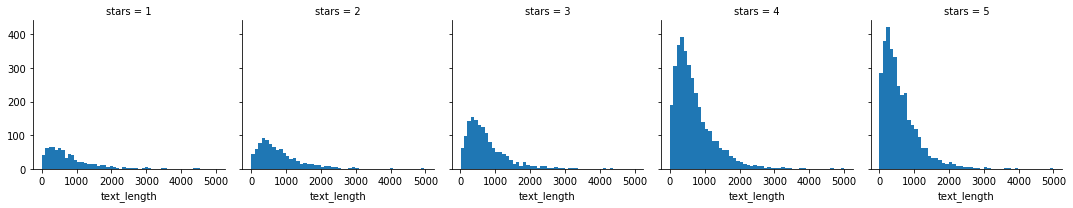

In [8]:
# Facetgrid Graph

graph = sb.FacetGrid(data = yelp, col ='stars')
graph.map(plt.hist , 'text_length' , bins = 50)

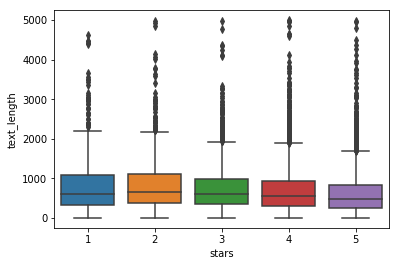

In [9]:
# Box Plot

box_plot = sb.boxplot(x='stars' , y='text_length' , data = yelp)

In [10]:
# Coorelation between Cool , funny , useful.

stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857671
useful,-0.743329,1.000000,0.894506,0.700016
funny,-0.944939,0.894506,1.000000,0.843528
text_length,-0.857671,0.700016,0.843528,1.000000


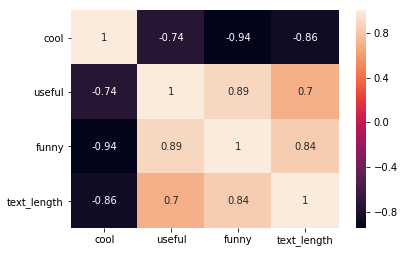

In [11]:
sb.heatmap(data = stars.corr() , annot=True)

In [12]:
# Since 2 , 3 and 4 star reviews can be considered as neutral we only take 1 star and 5 star reviews to determine Good or bad.

yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2/12/2010,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
9,nMHhuYan8e3cONo3PornJA,8/11/2010,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186
10,AsSCv0q_BWqIe3mX2JqsOQ,6/16/2010,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,#NAME?,1,3,1,298
11,e9nN4XxjdHj4qtKCOPq_vg,10/21/2011,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0,321
12,h53YuCiIDfEFSJCQpk8v1g,1/11/2010,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0,433
17,O510Re68mOy9dU490JTKCg,5/3/2010,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0,363


In [13]:
print(yelp_class.shape)
print(yelp_class.head())
print(yelp_class.info())
yelp_class.describe()

(4086, 11)
              business_id       date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
3  _1QQZuf4zZOyFCvXc0o6Vg  5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw   1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   
6  zp713qNhx8d9KCJJnrw1xA  2/12/2010  riFQ3vxNpP4rWLk_CSri2A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   
6  Drop what you're doing and drive here. After I...  review   

                  user_id  cool  useful  funny  text_length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0          889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0       

,stars,cool,useful,funny,text_length
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,4.266765,0.876897,1.422663,0.690651,661.938815
std,1.547868,2.336611,2.598515,1.961751,601.621371
min,1.000000,0.000000,0.000000,0.000000,6.000000
25%,5.000000,0.000000,0.000000,0.000000,256.000000
50%,5.000000,0.000000,1.000000,0.000000,489.500000
75%,5.000000,1.000000,2.000000,1.000000,878.000000
max,5.000000,77.000000,76.000000,39.000000,4986.000000


In [14]:
x = yelp_class['text']
y = yelp_class['stars']

In [15]:
# Text Pre-Processing

def text_pre_process(text):
    
    nopunc = [char for char in text if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
print(text_pre_process(x[0]))

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [17]:
bow_transform = CountVectorizer(analyzer = text_pre_process).fit(x)

In [18]:
len(bow_transform.vocabulary_)

26435

In [19]:
# Analysing the 25th review

review_24 = x[24]
review_24

"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [20]:
bow_25 = bow_transform.transform([review_24])
print(bow_25)

  (0, 2099)	1
  (0, 3006)	1
  (0, 8909)	1
  (0, 9151)	1
  (0, 9295)	1
  (0, 9616)	1
  (0, 9727)	1
  (0, 10847)	1
  (0, 11443)	3
  (0, 11492)	1
  (0, 11878)	1
  (0, 12221)	1
  (0, 13323)	1
  (0, 13520)	1
  (0, 14481)	1
  (0, 15165)	1
  (0, 16379)	1
  (0, 17812)	1
  (0, 17951)	1
  (0, 20044)	1
  (0, 20298)	1
  (0, 22077)	3
  (0, 24797)	1
  (0, 26102)	1


In [21]:
print(bow_transform.get_feature_names()[11443])
print(bow_transform.get_feature_names()[22077])

chicken
sandwich


In [22]:
x = bow_transform.transform(x)

In [23]:
print('Sparse Matrix Shape',x.shape)
print('Amount of non-zero occurances',x.nnz)

density = (100.0 * x.nnz/ (x.shape[0]*x.shape[1]))
print('Density : {}'.format((density)))

Sparse Matrix Shape (4086, 26435)
Amount of non-zero occurances 222391
Density : 0.2058920276658241


In [24]:
# Dividing the Data into Traning and Testing Set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [25]:
# Mutlinomial Naive Bayes

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# Testing the model

predict_1 = mnb.predict(x_test)

# Confusion Matrix , Classification Report

print(confusion_matrix(y_test, predict_1))
print('\n')
print(classification_report(y_test, predict_1))

[[142 104]
 [ 34 946]]


             precision    recall  f1-score   support

          1       0.81      0.58      0.67       246
          5       0.90      0.97      0.93       980

avg / total       0.88      0.89      0.88      1226



In [34]:
# Test on a Positivve and negative Review

review_pos = yelp_class['text'][101]
print(review_pos,"\n")

print(mnb.predict(bow_transform.transform([review_pos])))

Best food, super friendly staff, and great prices. Love it! 

[5]


In [66]:
review_neg = yelp_class['text'][61]
print(review_neg,"\n")

print(mnb.predict(bow_transform.transform([review_neg])))

I have always been a fan of Burlington's deals, however I will not be shopping at this one again. I went to return a belt... pretty simple. Instead, I stood in the customer service line for 15 minutes thanks to an employee of Burlington buying/putting things on layaway. It took three other staff to help her out. There were no words said to me except "Hold on". I was pissed. When the lady was finally done, the employee at the service asked "what do you want?" Serious help is needed there!
 If you work in the area of "customer service" I think you should have some. 

[1]


In [55]:
# Where model Failed

review_fail = yelp_class['text'][31]
print(review_neg,"\n")

print(mnb.predict(bow_transform.transform([review_fail])))

Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them. 

[5]
